In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [27]:
df.shape

(10000, 14)

In [28]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [31]:
# # Dividing dependent and independent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [32]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [58]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [59]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,1,24,2,0,0,1,1,5068,1
1,217,1,1,23,1,743,0,0,1,5639,0
2,111,0,1,24,8,5793,2,1,0,5707,1
3,308,0,1,21,1,0,1,0,0,4704,0
4,459,1,1,25,2,3696,0,1,1,3925,0


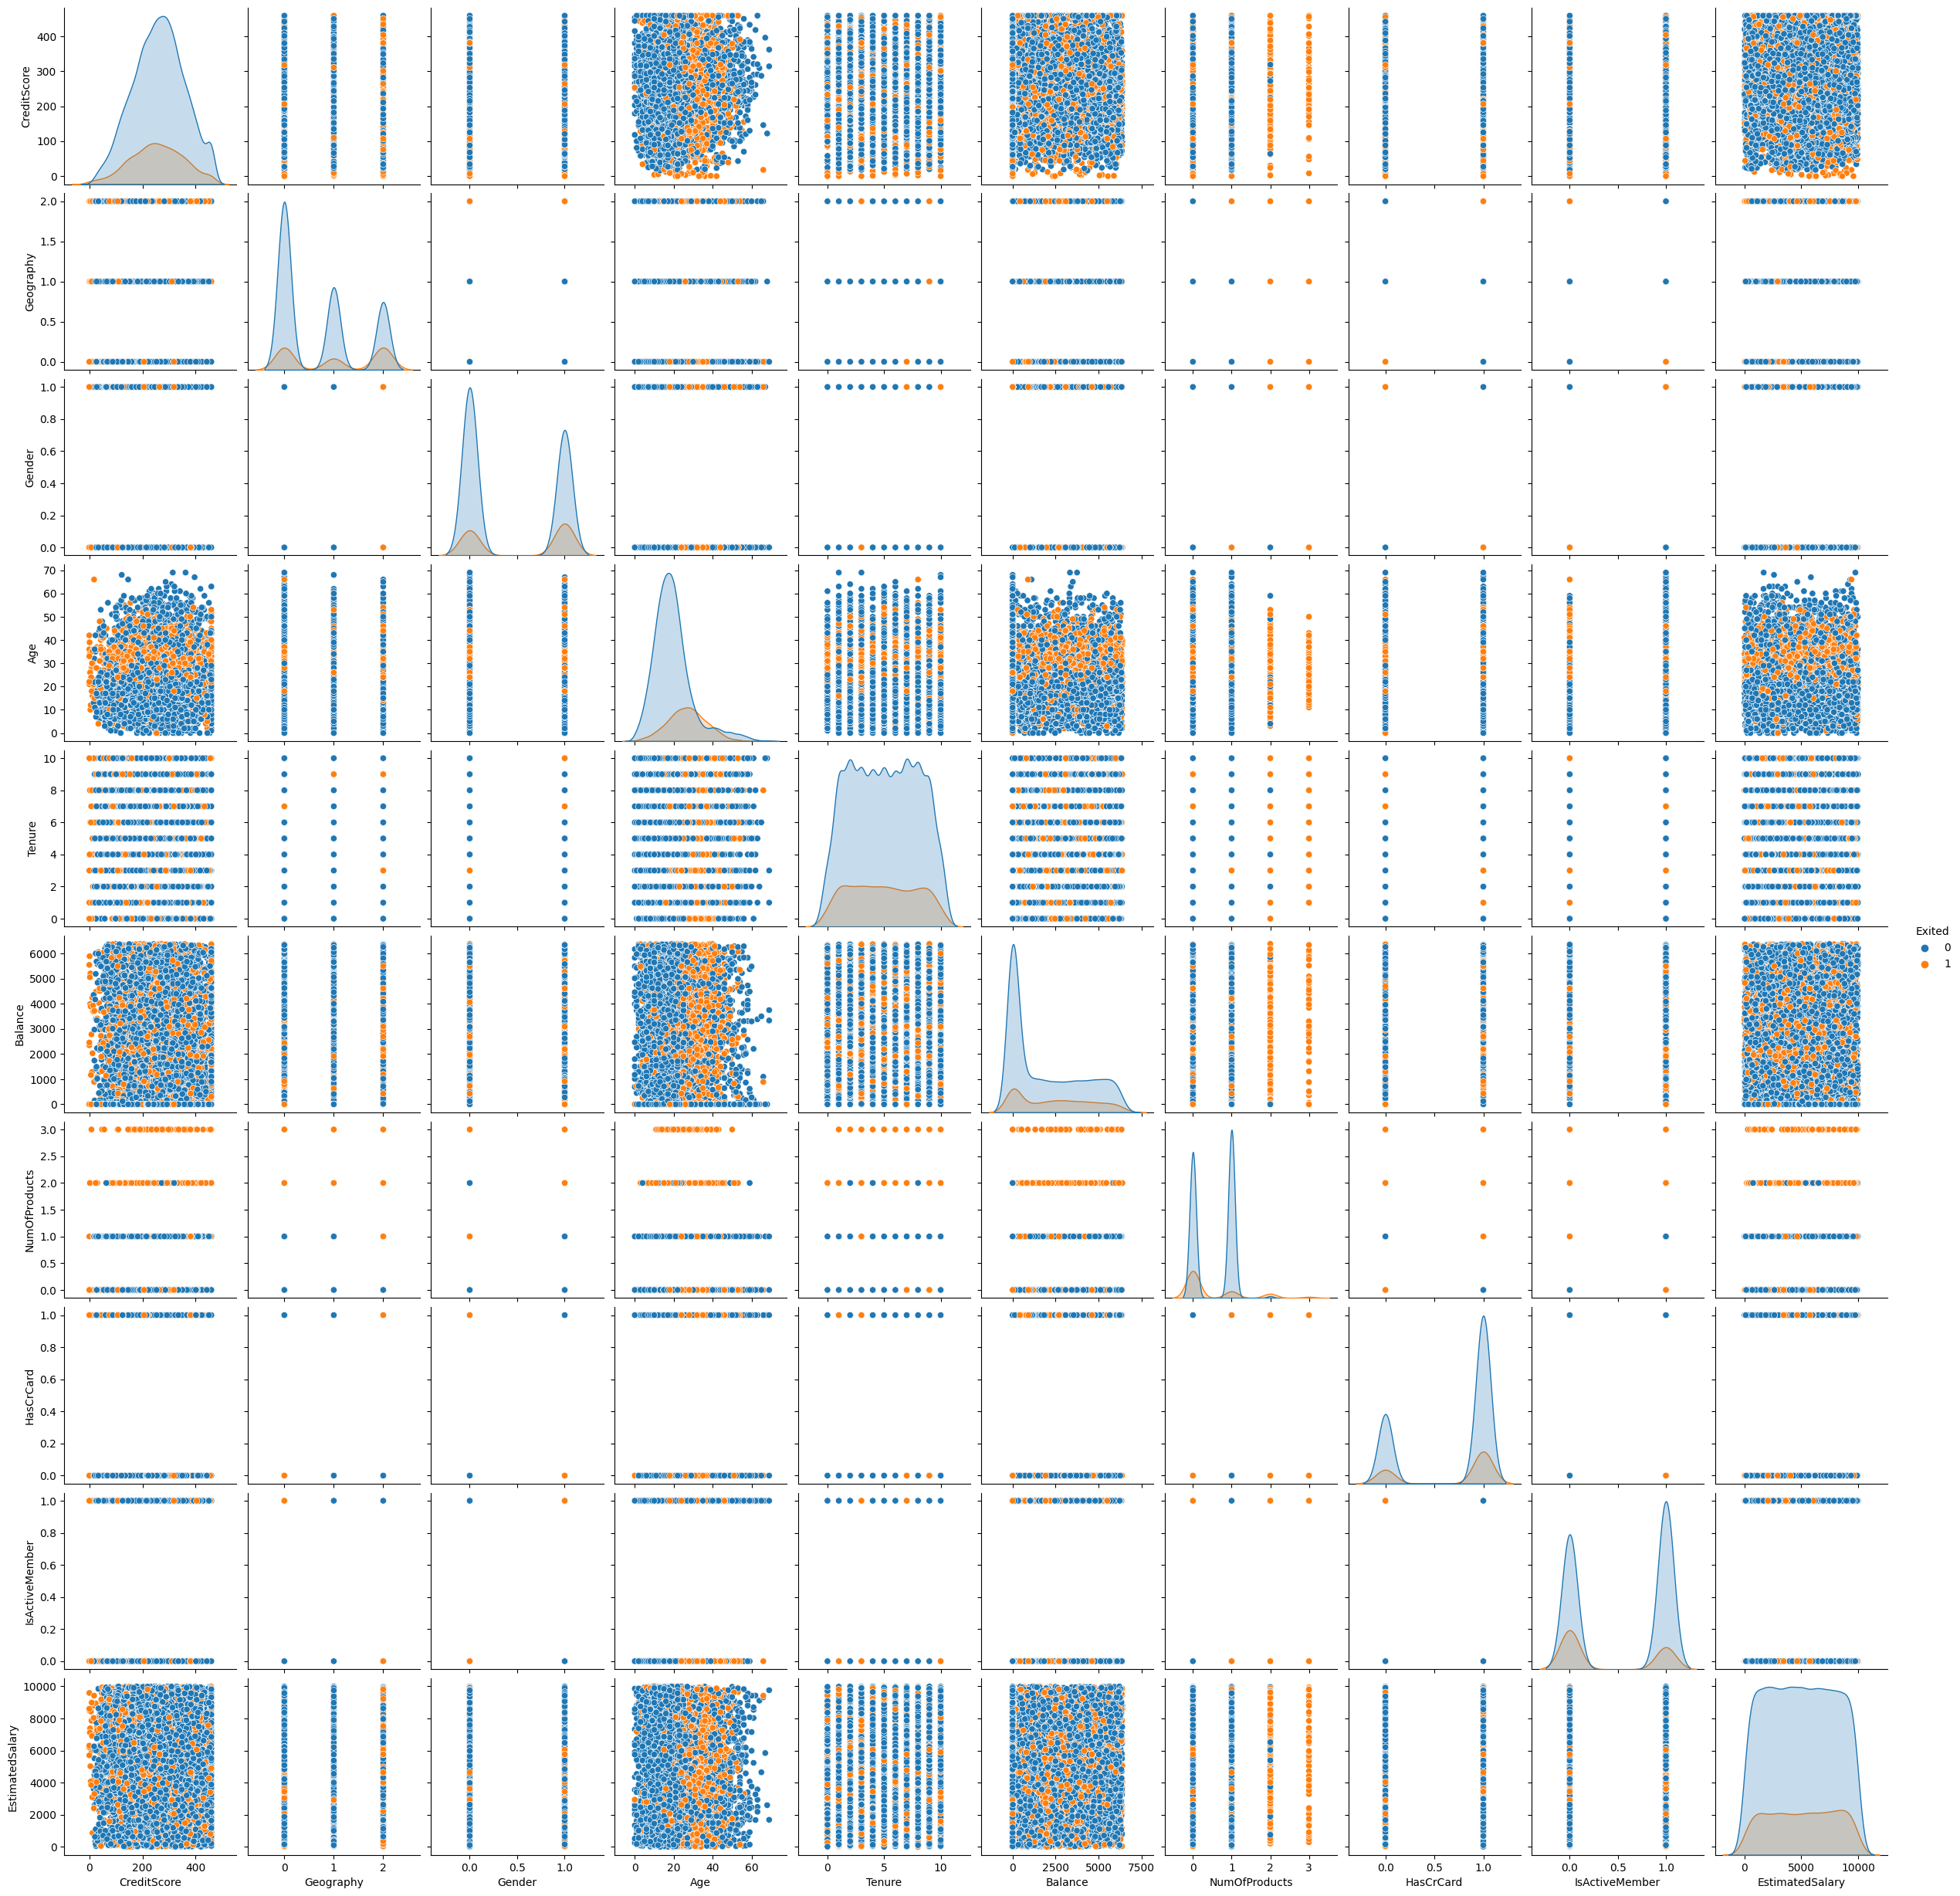

In [60]:
sns.pairplot(df,hue='Exited')

In [61]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 7963, 0: 7963})


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
lr_model=classifier.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

In [44]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.25      0.00      0.01       497

    accuracy                           0.80      2500
   macro avg       0.53      0.50      0.45      2500
weighted avg       0.69      0.80      0.71      2500



Text(50.722222222222214, 0.5, 'Actual Label')

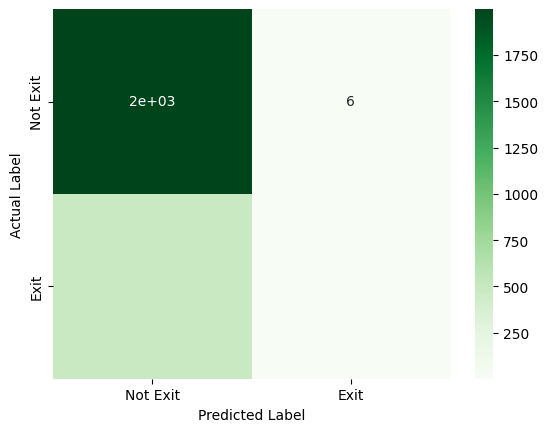

In [45]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
#Train decision tree classifier
dt_model=clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=dt_model.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.25      0.00      0.01       497

    accuracy                           0.80      2500
   macro avg       0.53      0.50      0.45      2500
weighted avg       0.69      0.80      0.71      2500



Text(50.722222222222214, 0.5, 'Actual Label')

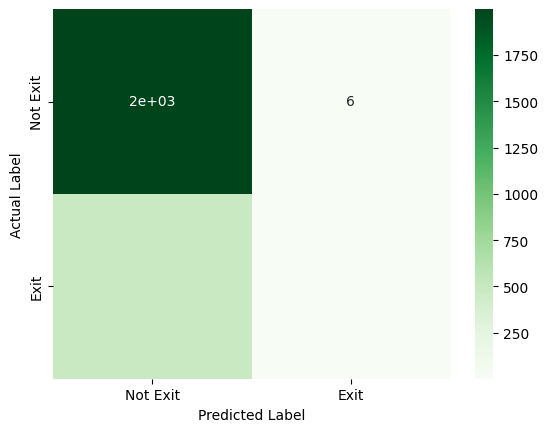

In [43]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Knn

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=25)
#Train tehe model using the training set
knn_model=clf.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.25      0.00      0.01       497

    accuracy                           0.80      2500
   macro avg       0.53      0.50      0.45      2500
weighted avg       0.69      0.80      0.71      2500



Text(50.722222222222214, 0.5, 'Actual Label')

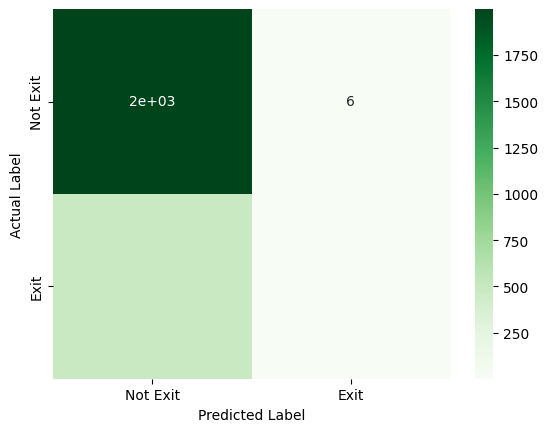

In [47]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Classification report

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.25      0.00      0.01       497

    accuracy                           0.80      2500
   macro avg       0.53      0.50      0.45      2500
weighted avg       0.69      0.80      0.71      2500



In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc_score=accuracy_score(y_test,y_pred)
p_score=precision_score(y_test,y_pred)
re_score=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)
print(f'Accuracy score of the model is{acc_score}')
print(f'precision score of the model is{p_score}')
print(f'recall score of the model is{re_score}')
print(f'f1_score of the model is{f_score}')

Accuracy score of the model is0.7996
precision score of the model is0.25
recall score of the model is0.004024144869215292
f1_score of the model is0.007920792079207921


In [40]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1997,    6],
       [ 495,    2]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

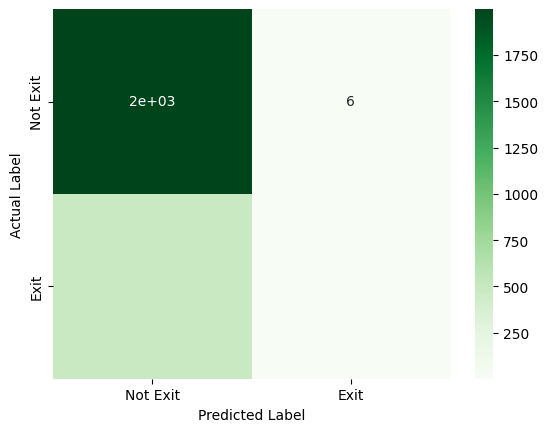

In [41]:
x_axis_labels=['Not Exit','Exit']
y_axis_labels=['Not Exit','Exit']
confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m,annot=True,cmap='Greens',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Linear regression

In [18]:
#Linear regression
from sklearn import linear_model
li_model=linear_model.LinearRegression()
li_model.fit(X_train,y_train)
y_pred=li_model.predict(X_test)


In [19]:
from sklearn.metrics import r2_score

# After making predictions, you can calculate the R-squared score like this:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.14832983425349489


In [20]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 0.28489488144986796
Mean Squared Error: 0.13565279759506468
Root Mean Squared Error: 0.36831073510700807
r2_score: 0.14832983425349489


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.49      0.61       497

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.87      0.87      0.86      2500



In [50]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1938,   65],
       [ 253,  244]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

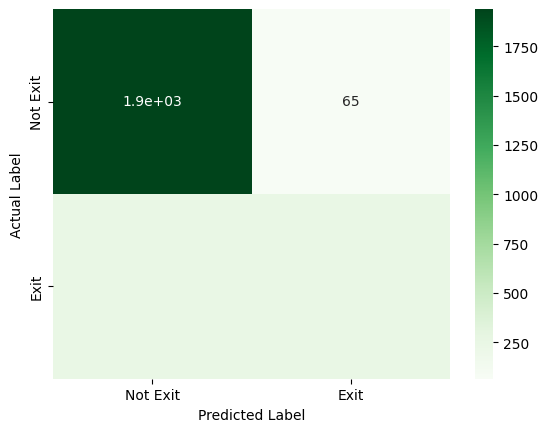

In [51]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Build Ann Model

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [55]:
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10


235/235 [==============================] - 9s 4ms/step - loss: 574.3437 - accuracy: 0.6563
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 75.1110 - accuracy: 0.6465
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 53.9369 - accuracy: 0.6773
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 66.2627 - accuracy: 0.6801
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 50.5313 - accuracy: 0.6721
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 65.3424 - accuracy: 0.6765
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 61.3644 - accuracy: 0.6756
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 55.9401 - accuracy: 0.6708
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 44.5807 - accuracy: 0.6823
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 59.9252 - acc

In [56]:
# Make prediction
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5).astype(int)

79/79 [==============================] - 0s 3ms/step
